# 두 변수의 관계

데이터 과학의 가장 중요한 주제는 예측(prediction)이다. 데이터 과학에서는 관심 있는 반응 변수(response variable)의 값들이 설명 변수(explanatory variables, features)의 변화에 따라서 어떻게 변하는지 나타내는 관계를 추정하여 예측을 수행한다.
따라서 예측을 수행하기 위해서 여러 개 변수들의 관계를 먼저 알아보는 분석이 이루어진다. 


두 변수가 경험적 관계(empirical relation)를 보인다는 것은 주어진 데이터에서 하나의 변수의 변화를 나머지 변수의 변화를 이용하여 어느 정도 설명할 수 있다는 의미이다. 데이터를 기반으로 두 변수의 값들 사이에 함수적인 관계를  추론할 수 있는 경우 서로 경험적 관계가 있다고 말할 수 있으며 이를 이용하여 예측도 수행할 수 있다.

이때 주의해야 할 점은 경험적 관계가 나타난다고 해도 두 변수가 서로 직접 영향을 미치는 인과 관계(causal relation)가 아닌 경우도 많다. 

예를 들어 아이스크림의 판매량과 에어콘의 판매량은 유의한 통계적 관계를 보인다. 하지만 이러한 관계는 두 변수의 인과관계 때문에 나타나는 것이 아니라 제3의 변수인 기온이 두 변수에 직접적인 영향을 미쳐서 나타나는 관계이다. 이 경우 제3의 변수인 기온을 잠재변수(confounding variable)이라고 부른다.

여러 변수들의 경험적 관계에 대한 분석은 인과 관계를 구명하기 위한 연구에 중요한 기초 정보를 제공한다. 이 절에서는 다양한 사례를 통하여 두 변수의 관계를 시각적으로 분석하는 방법을 알아보고 경험적 관계를 수치적으로 측정할 수 있는 상관계수(correlation coefficent)에 대하여 알아본다.   

In [1]:
# 한글 폰트가 깨질 때 사용 - 런타임 메뉴에서 다시 시작 및 모두 실행 선택. (출처: https://teddylee777.github.io/colab/colab-korean)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import rc
%matplotlib inline

plt.rc('font', family='NanumBarunGothic') # clolab 에서 한글 사용 
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams["figure.figsize"] = (10,7)   # 그림 크기 조정

## 아버지와 아들의 키


[Francis Galton](https://en.wikipedia.org/wiki/Francis_Galton) 은 영국의 학자로서 1885년에 아버지와 아들의 키에 대한 관계에 대한 연구를 데이터에 기반하여 수행하였다. Galton의 이러한 데이터에 기반한 경험적 연구는 데이터를 이용한 통계적 관계 분석의 시초로 여겨지고 있다. 

이제 1087 개로 이루어진 아버지와 아들의 키 자료를 데이터프레임 `father_son_df` 으로 저장하자. 

- `fheight`: 아버지의 키 (단위: inch)
- `sheight`: 아들의 키 (단위: inch)


In [4]:
url1 = "https://ilovedata.github.io/teaching/bigdata2/data/father-and-son.csv"
father_son_df = pd.read_csv(url1, sep=',', encoding = 'utf-8-sig')

In [5]:
father_son_df.head(10)

,fheight,sheight
0,65.04851,59.77827
1,63.25094,63.21404
2,64.95532,63.34242
3,65.75250,62.79238
4,61.13723,64.28113
5,63.02254,64.24221
6,65.37053,64.08231
7,64.72398,63.99574
8,66.06509,64.61338
9,66.96738,63.97944


In [6]:
father_son_df.shape

(1078, 2)

위의 아버지와 아들의 자료는 단위가 inch 이므로 우리 한국 사람들한테는 익숙하지 한다. 자료의 단위를 센티미터로 바꾸어 보자.

$$ \text{ 2.54 cm } = \text{ 1.0 inch} $$


In [7]:
father_son_df.fheight =  father_son_df.fheight*2.54
father_son_df.sheight =  father_son_df.sheight*2.54
father_son_df.head(10)

,fheight,sheight
0,165.223215,151.836806
1,160.657388,160.563662
2,164.986513,160.889747
3,167.011350,159.492645
4,155.288564,163.274070
5,160.077252,163.175213
6,166.041146,162.769067
7,164.398909,162.549180
8,167.805329,164.117985
9,170.097145,162.507778


이제 아버지의 키와 아들의 키를 산점도를 그려서 관계를 살펴보자. 아래 산점도에서 여러분은 아버지의 키가 증가하면 아들의 키도 증가하는 **경향(trend)**이 나타나는 현상을 볼 수 있다. 하지만 아버지의 키가 크다고 해서 아들의 키가 반드시 큰 것은 아니다. 또한  반대로 아버지의 키가 작아지면 아들의 키도 반드시 작아지는 것은 아니다.


<AxesSubplot:xlabel='fheight', ylabel='sheight'>

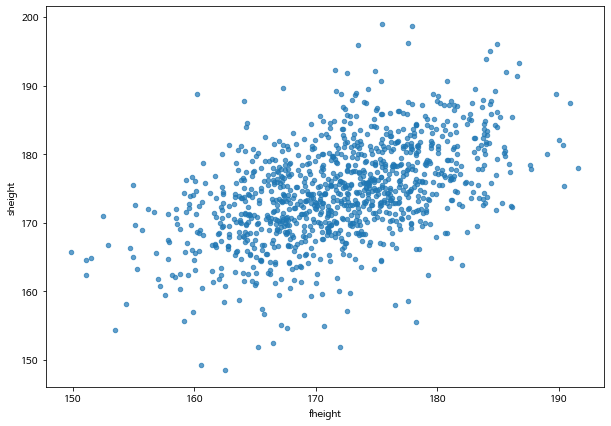

In [8]:
father_son_df.plot.scatter(x='fheight', y='sheight', alpha=0.7)

이제 아버지와 아들의 키에 대한 관계를 좀 더 시각적으로 명확하게 보기 위하여 아버지와 아들의 키에 대한 평균값을 산점도에 추가해보자.

아버지의 키가 평균보다 커도 아들의 키는 전체 아들의 평균값보다 작은 경우도 나타난다. 또한 반대로 어버지의 키가 평균보다 작아도 아들의 키가 그 평균값보다 큰 경우도 있다. 하지만 
아버지의 키와 아들의 키는 완벽하지는 않지만  전체적으로 비례적인 경향을 보이고 있다.  


In [9]:
father_son_df.describe()

,fheight,sheight
count,1078.000000,1078.000000
mean,171.925226,174.457537
std,6.971966,7.149342
min,149.880320,148.607983
25%,167.100847,170.005331
50%,172.127164,174.284183
75%,176.791569,178.983564
max,191.602182,199.046567


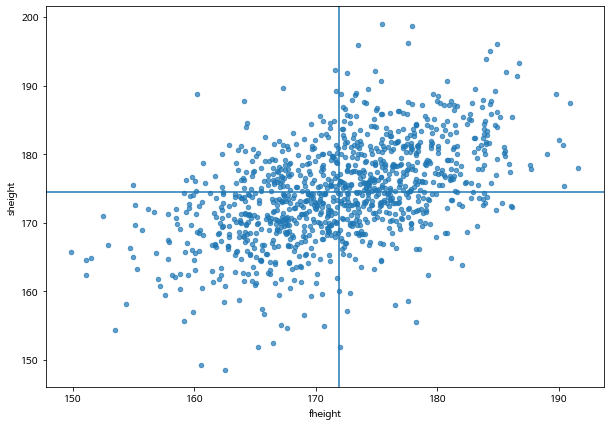

In [10]:
father_son_df.plot.scatter(x='fheight', y='sheight', alpha=0.7)
plt.axvline(x=np.mean(father_son_df.fheight)) 
plt.axhline(y=np.mean(father_son_df.sheight))

## 상관계수


이러한 두 변수의 **선형적 비례 관계(linear relation)** 을 수치적으로 나타나는 측도가 **상관계수(correlation coefficient; r)** 이다. 자료가 주어졌을 때 상관계수를 계산하는 방법에 대하여 알아보자.

두 개의 변수 $x$ 와 $y$ 에 대하여 다음과 같이 $n$ 개의 자료가 있다고 하자.

$$ (x_1, y_2), (x_2, y_2), \dots , (x_n, y_n) $$

두 변수 $x$ 와  $y$ 의 자료에 대한 평균과 표준편차를 다음과 같이 표시하자.

$$ \bar x = \frac{\sum_{i=1}^n x_i}{n}, \quad \bar y = \frac{\sum_{i=1}^n y_i}{n} $$

$$ SD_x = \sqrt{ \frac{ \sum_{i=1}^n (x_i-\bar x)^2}{ n-1}}, \quad
SD_y = \sqrt{ \frac{ \sum_{i=1}^n (y_i-\bar y)^2}{ n-1}} $$

상관계수 $r$는 평균과 표분편차를 이용하여 다음과 같이 계산할 수 있다. 

$$ r = \frac{\sum_{i=1}^n (x_i -\bar x)(y_i -\bar y)}
{(n-1)SD_x SD_y} $$


상관계수 $r$ 는 다음과 같은 성질을 가진다.

- 상관계수 $r$ 은 -1 과 1 사이의 값을 가질 수 있다.
- $r=1$ 인 경우 두 변수는 완벽한 양의 선형 비례관계가 있다고 말한다. 
- $r=-1$ 인 경우 두 변수는 완벽한 음의 선형 비례관계가 있다고 말한다. 
- 만약 $r=0$ 인 경우 두 변수는 선형 관계가 전혀 없다고 말할 수 있다.
- 상관계수 $r$ 의 절대값이 커지면 선형관계의 강도가 카진다.  

여기서 주의할 점은 상관계수 $r$은 선형관계(linear relation)의 강도를 측정하는 통계량이다. 비선형성(nonlinearity)와 같은 선형이 아닌 특별한 관계는 측정하기 어럽다.

이제 Galton의 아버지와 아들의 키 자료에 대한 상관계수를 구해보자. 상관계수는 메소드 `corr()`으로 쉽게 구할 수 있다.



In [11]:
father_son_df.corr()

,fheight,sheight
fheight,1.000000,0.501338
sheight,0.501338,1.000000


Galton의 아버지와 아들의 키 자료에서 상관계수가 약 0.5 로 나타난다. 이 관계는 
어느 정도 강한 양의 선형 관계를 가진다고 볼 수 있다.

상관계수의 값과 두 변수의 관계를 좀 더 일아보기 위하여 모의실험으로 자료를 만들어 보자.

일단 두 확률 변수 $x$ 와 $y$가 각각 표준 정규분포 $N(0,1)$을 따른다고 가정하자. 
두 변수의 상관계수가 $r$ 인 이변량 정규분포에서 500개의 난수(random number)로 발생시켜 산점도를 그려보자. 이변량 정규분포(bivariate normal distibution)은 두 개의 확률변수가 각각 정규분포를 따르는 경우 두 변수의 관계를 상관계수로 나타내는 분포이다.

$$ \text{correlation}(X, Y) =r \quad \text{when} \quad X \sim N(0,1), Y \sim N(0,1) $$

이제 여러분은 아래 코드에서 상관계수 $r$의 값을 변화시키면서 난수로 발생된 데이터의 산점도를 이용하여 두 변수의 선형관계가 어떻게 변하는지 알 수 있다.

상관계수가 0.5 이며 두 변수가 각각 정규분포를 따르는 경우의 산점도가 아버지와 아들의 키에 대한 산점도와 매우 유사한 자료의 구조를 보이는 것으로 나타난다. 여러분이 앞 절에도 보았듯이 키의 분포는 정규분포와 매우 유사하다는 것을 유의하자.

In [12]:
# 상관계수 r 값에 -1 과 1 사이의 값을 지정한다.
r = 0.5
mean = [0, 0]
cov = [[1, r ], [r, 1]] 

In [13]:
# 상관계수가 r 이며 각각 표본정규분포를 따르는 x, y 의 난수 1078개를 임의로 추출
x, y = np.random.multivariate_normal(mean, cov, 1078).T
sim_df = pd.DataFrame({'x':x, "y":y})
sim_df.head(10)

,x,y
0,0.491602,1.017568
1,-1.569006,-1.806697
2,1.437690,0.543020
3,-0.699054,0.669142
4,0.494045,-0.348794
5,-0.428539,-0.178774
6,-0.814962,0.563324
7,1.310107,1.131025
8,-2.702735,-2.092235
9,0.356005,0.838393


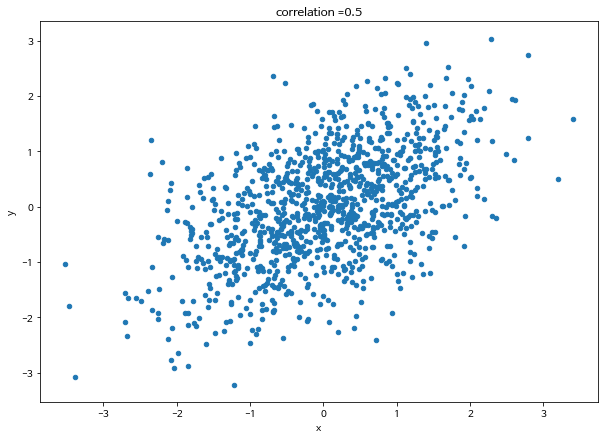

In [14]:
sim_df.plot.scatter(x='x', y='y')
plt.title('correlation ='+ str(r))
plt.show()

위의 코드를 이용하여 상관계수의 값과 데이터의 개수를 인자로 받아 데이터프레임을 만들어 주는 간단한 함수를 만들어 보자.

In [15]:
def random_df_corr(r,N):
  mean = [0, 0]
  cov = [[1, r ], [r, 1]] 
  x, y = np.random.multivariate_normal(mean, cov, N).T
  return pd.DataFrame({'x':x, "y":y})

<AxesSubplot:xlabel='x', ylabel='y'>

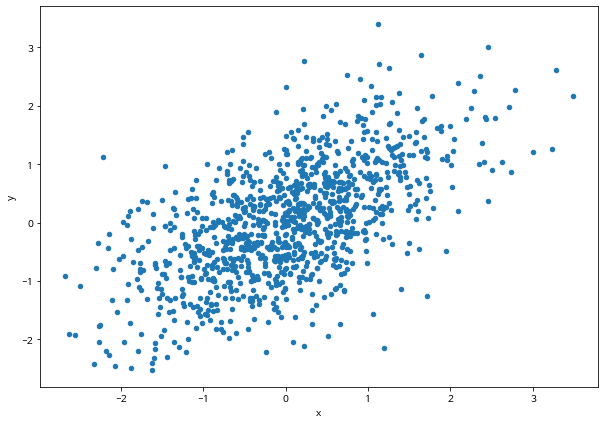

In [16]:
random_df_corr(0.6,1078).plot.scatter(x='x', y='y')

앞에서 언급하였지만 두 변수가 선형관계가 아닌 특별한 관계를 가진 경우 상관계수는 이러한 특별한 관계를 반영하지 못하는 경우가 많다.

예를 들어 아래 그림과 같이 $x$와 $y$ 가 이차식의 형태로 비선형적 관계를 가지고 있는 경우 상관계수는  0에 가까운 값을 가진다.

즉, 상관계수가 0 이면 선형관계가 없다는 의미이지 어떤 관계도 없다는 의미는 아니다. 

<AxesSubplot:xlabel='x', ylabel='y'>

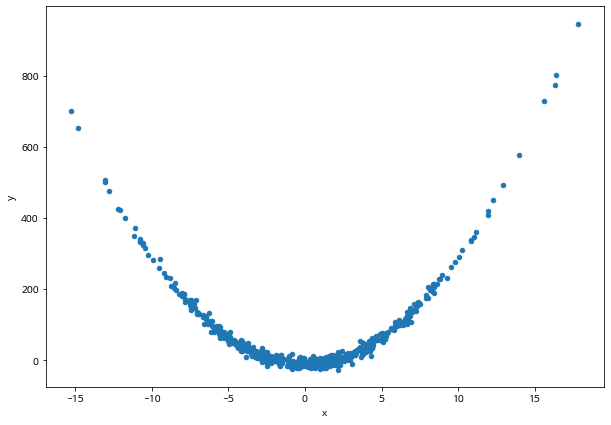

In [17]:
n=500
x = np.random.normal(0, 5, n)
y = 3.0 * x**2 -10.0 + np.random.normal(0, 10, n)
df_quad = pd.DataFrame({'x':x, 'y':y})
df_quad.plot.scatter(x='x', y='y')

In [18]:
df_quad.corr()

,x,y
x,1.000000,0.060632
y,0.060632,1.000000


## 변수의 표준화

위에서 주어진 상관계수 $r$ 의 계산식을 다음과 같이 나타낼 수 도 있다.

$$ r = \frac{1}{n-1} \sum_{i=1}^n  \left ( \frac{x_i -\bar x}{SD_x} \right ) \left ( \frac{y_i -\bar y}{SD_y} \right ) = \frac{1}{n-1}  \sum_{i=1}^n z_i w_i$$


위의 식에서 나타난 것과 같이 각 관측값에서 평균을 빼고, 그 값을 표준편차로 나누는 작업을 변수의 표준화(standarization)이라고 한다.

$$ z_i = \frac{x_i -\bar x}{SD_x},  w_i =\frac{y_i -\bar y}{SD_y}$$

이렇게 변수를 표준화하면 변화돤 자료는 평균이 0 이 되고 표준편차는 1이 된다.

$$  \bar z = \bar w  =0$$

$$ SD_z = SD_w  = 1 $$


데이터를 표준화하는 작업은 데이터과학에서 자주 사용된다. 여러 개의 변수들의 관계를 고려하는 경우 각 변수에 대한 단위(scale)이 다르면 비교가 어려운 경우가 있고 더 나아가 예측 모형의 성능에도 영향을 주는 경우가 있다. 따라서 많은 변수를 동시에 비교하면서 분석하는 경우 모두 표준화를 해주면 비교나 분석이 편리한 경우가 많다.

**참고로 상관계수는 두 변수의 단위에 영향을 받지 않고 언제나 동일하다.**

이제 리스트와 시리즈 등 데이터를 표준화 하는 함수를 만들어 보자.

In [19]:
def standarize(x):
  return (x - np.mean(x))/np.std(x)

In [20]:
standarize([1,2,3,4,5,6])

array([-1.46385011, -0.87831007, -0.29277002,  0.29277002,  0.87831007,
        1.46385011])

아버지와 아들의 키에 대한 데이터프레임에 두 열에 대하여 다음과 같은 코드로 표준화를 적용할 수 있다.

In [21]:
father_son_df_st = father_son_df.apply(standarize, axis=0)

In [22]:
father_son_df_st.head(5)

,fheight,sheight
0,-0.961726,-3.165498
1,-1.616914,-1.944280
2,-0.995692,-1.898648
3,-0.705132,-2.094156
4,-2.387330,-1.564991


In [23]:
father_son_df_st.describe()

,fheight,sheight
count,1.078000e+03,1.078000e+03
mean,-4.050491e-14,2.438217e-14
std,1.000464e+00,1.000464e+00
min,-3.163403e+00,-3.617333e+00
25%,-6.922894e-01,-6.230326e-01
50%,2.897772e-02,-2.425882e-02
75%,6.983112e-01,6.333628e-01
max,2.823607e+00,3.440938e+00


In [24]:
father_son_df_st.corr()

,fheight,sheight
fheight,1.000000,0.501338
sheight,0.501338,1.000000


<AxesSubplot:xlabel='fheight', ylabel='sheight'>

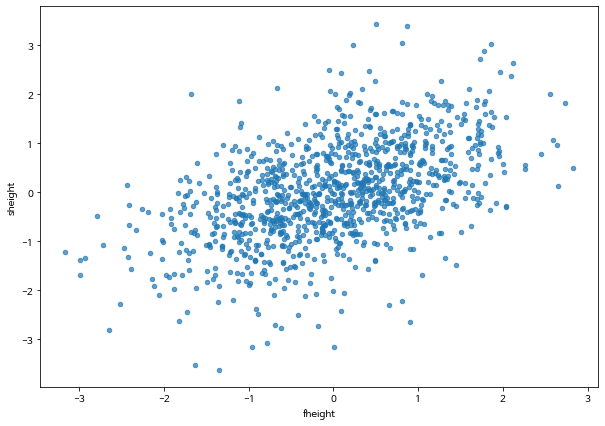

In [25]:
father_son_df_st.plot.scatter(x='fheight', y='sheight', alpha=0.7)

## 예제1: 키와 몸무게의 관계

먼저 국민체력100에서 얻은 체력측정 데이터에서 키와 몸무게의 관계를 살펴보자.


In [26]:
url2 = "https://ilovedata.github.io/teaching/bigdata2/data/physical_test_2018_data.csv"
physical_data = pd.read_csv(url2, sep=',', encoding = 'utf-8-sig')

In [27]:
physical_01 = physical_data[['TEST_SEX', 'TEST_AGE', 'ITEM_F001', 'ITEM_F002']].rename(columns={'TEST_SEX': 'sex', 'TEST_AGE':'age' ,'ITEM_F001':'height', 'ITEM_F002':'weight'})
physical_01.head(5)

,sex,age,height,weight
0,M,33,159.2,57.2
1,F,48,155.8,52.9
2,M,22,175.2,96.2
3,M,29,178.7,79.4
4,F,31,160.1,50.2


먼저 19세 이상의 성인 남자의 키와 몸무게 관계를 산점도로 그리고 상관계수를 구해보자.

In [28]:
physical_M = physical_01.loc[(physical_01.sex =="M") & (physical_01.age >= 19)]

<AxesSubplot:xlabel='height', ylabel='weight'>

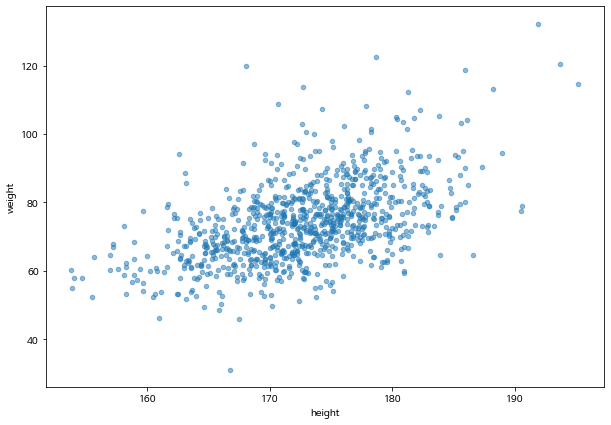

In [29]:
physical_M.plot.scatter(x='height', y='weight', alpha=0.5)

In [30]:
physical_M[['height','weight']].corr()

,height,weight
height,1.000000,0.523845
weight,0.523845,1.000000


이제 19세 이상의 성인 여자의 키와 몸무게 관계를 산점도로 그리고 상관계수를 구해보자.

In [31]:
physical_F = physical_01.loc[(physical_01.sex =="F") & (physical_01.age >= 19)]

<AxesSubplot:xlabel='height', ylabel='weight'>

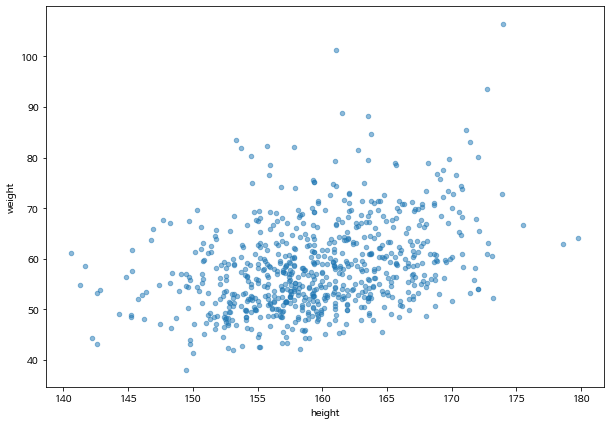

In [32]:
physical_F.plot.scatter(x='height', y='weight', alpha=0.5)

In [33]:
physical_F[['height','weight']].corr()

,height,weight
height,1.000000,0.353592
weight,0.353592,1.000000


위에서 볼 수 있듯이 남자에 대한 키와 몸무게의 상관계수는 0.52로 여자의 상관계수 0.35보다 약간 높게 나타난다. 주의할 점은 위의 분석 결과가 우리 나라의 전체 남여에 대한 키와 몸무게의 일반적인 관계를 나타내는 것을 아닐 수 있다. 왜냐하면 국민체력100의 데이터는 확률표본이 아니기 때문이다. 

위에서 본 남자와 여자의 산점도는 정규분포를 따르는 경우의 산점도와 유사하다. 이는 키와 몸무게의 분포가 정규분포와 매우 유사하기 때문이다.

참고로 `groupby` 메소드를 사용하면 남자와 여자가 모두 포함된 데이터프레임에서도 남여 각각에 대한 상관계수를 구할 수 있다.

In [34]:
physical_01.loc[physical_01.age >= 19,['sex','height','weight']].groupby(by = "sex").corr()

height    weight
sex                           
F   height  1.000000  0.353592
    weight  0.353592  1.000000
M   height  1.000000  0.523845
    weight  0.523845  1.000000

## 예제2: 아파트의 면적과 가격

아파트의 면적과 가격은 어떤 관계를 보일까?

[서울 열린 데이터 광장](http://data.seoul.go.kr/dataList/OA-12532/S/1/datasetView.do)에서 2019년 서울특별시 부동산 실거래가 정보를 가진 데이터 화일을 다운로드 받아보자.

2019년 거래하여 신고한 주택들의 위치와 정보 그리고 실거래 가격이 포함된 자료이다.



In [35]:
url3 = "https://ilovedata.github.io/teaching/bigdata2/data/seoul_apartment_2019.csv"
apart_2019_1 = pd.read_csv(url3, encoding="CP949")

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25740\3473691082.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  apart_2019_1 = pd.read_csv(url3, encoding="CP949")


In [36]:
apart_2019_1.head(3)

,실거래가아이디,지번코드,시군구코드,자치구명,법정동코드,법정동명,신고년도,업무구분코드,업무구분,물건번호,대지권면적,건물면적,관리구분코드,층정보,건물주용도코드,건물주용도,물건금액,건축년도,건물명
0,11140-2019-4-0003930-1,1.11402E+18,11140,중구,1114017400,만리동2가,2019,4,신고,1,0.0,84.97,0,15.0,2001,아파트,1390000000,2017.0,서울역센트럴자이
1,11140-2019-4-0003994-1,1.11402E+18,11140,중구,1114017400,만리동2가,2019,4,신고,1,0.0,59.94,0,8.0,2001,아파트,950000000,2017.0,서울역센트럴자이
2,11140-2019-4-0004611-1,1.11402E+18,11140,중구,1114017400,만리동2가,2019,4,신고,1,0.0,84.97,B,15.0,2001,아파트,1345000000,0.0,서울역센트럴자이


In [37]:
apart_2019_1.columns

Index(['실거래가아이디', '지번코드', '시군구코드', '자치구명', '법정동코드', '법정동명', '신고년도', '업무구분코드',
       '업무구분', '물건번호', '대지권면적', '건물면적', '관리구분코드', '층정보', '건물주용도코드', '건물주용도',
       '물건금액', '건축년도', '건물명'],
      dtype='object')

이제 각 구별로 도수 분포표를 구해보면 2019년 1년간 거래된 주택들의 수가 알마나 되는지 알 수 있다.

In [38]:
apart_2019_1[['자치구명']].value_counts()

자치구명
송파구     8719
강서구     8229
노원구     7953
은평구     7150
성북구     6668
강동구     6651
양천구     6622
강남구     6404
구로구     5880
마포구     5597
영등포구    5147
관악구     4955
서초구     4834
동대문구    4773
서대문구    4660
동작구     4563
도봉구     4543
중랑구     4354
광진구     4337
성동구     3969
금천구     3841
강북구     3657
용산구     3399
종로구     1770
중구      1597
dtype: int64

아래 파이썬 코드는 필요한 변수를 선택하고 정리하는 코드이다.

- 자료에서 이미 지어진 아파트의 거래만 선택(분양 아파트 제외)한다.
- 거래가격의 단위는 백만원으로 변경한다.

다운로드 받은 자료 중 우리가 분석에 이용할 변수의 이름과 의미는 다음과 같다.

- `year_sale`: 신고연도, 거래가 이루어진 년도
-	`gu`: 자치구 이름
- `area` : 건물 면적(제곱미터)
-  `floor`: 층수
-  `year_built`: 건축연도, 주택이 지어진 년도
- 	`price`: 거래 가격(백만원)

In [39]:
#필요한 변수만 선택
apart_2019_2 = apart_2019_1[['신고년도', '자치구명', '건물면적',  '층정보', '건축년도','건물주용도', '물건금액']]
# 건축연도가 0 보다 큰 아파트만 선택 (선분양 아파트는 아직 건축되지 않았기 때문에 건축연도가 0이며 분석에서 제외)
apart_2019_3 = apart_2019_2.loc[ (apart_2019_2['건물주용도'] == "아파트") & (apart_2019_2['건축년도'] > 0.0)]
# 층과 연도를 정수 형식으로 변환
apart_2019_4 = apart_2019_3.astype({'층정보': 'int', '건축년도': 'int', '신고년도': 'int'})
# 거래 가격의 단위를 백만원으로 
price = apart_2019_4['물건금액']/1000000
# 거래 가격을 정수 형식으로 변환 
price = price.astype('int')
apart_2019_4['price'] = price
# 열이름을 영문으로 변환
apart_2019_5 = apart_2019_4.rename(columns={'신고년도': 'year_sale', '자치구명':'gu','건물면적':'area', '층정보':'floor', '건축년도':'year_built', '건물주용도':'type', '물건금액':'orig_price'})
# 행 인덱스의  초기화
apart_2019 = apart_2019_5[['year_sale', 'gu', 'area','floor','year_built','price']].reset_index(drop=True)

In [40]:
apart_2019.shape

(67238, 6)

In [41]:
apart_2019.head(5)

,year_sale,gu,area,floor,year_built,price
0,2019,중구,84.97,15,2017,1390
1,2019,중구,59.94,8,2017,950
2,2019,중구,59.94,18,2002,785
3,2019,중구,59.89,9,2011,990
4,2019,성동구,84.87,12,2007,1450


이제 아파트의 면적과 거래 가격의 관계를 산점더를 이용하여 살펴보자.

아래 산점도를 보면 아파트의 면적과 거래 가격의 관계는 앞에서 살펴본 키와 몸무게의 관계와는 매우 다른 형태를 보인다. 먼저 전체적으로 아파트의 면적이 증가하면  거래 가격도 증가하는 경향을 보인다. 즉, 양의 상관관계를 가질 것으로 예상할 수 있다. 

특이한 점은 아파트의 면적이 증가하면 가격의 평균적인 추세도 증가하지만 가격의 변동(variation)도 증가한다. 이는 산점도의 모양이 가격이 증가할수록 가격의 퍼진 범위가 증가하는 것으로 일 수 있다.

이렇게 평균적인 추세와 변동성이 모두 증가하는 현상은 경제와 관련된 변수들에서 흔히 나타나는 현상이다. 


<AxesSubplot:xlabel='area', ylabel='price'>

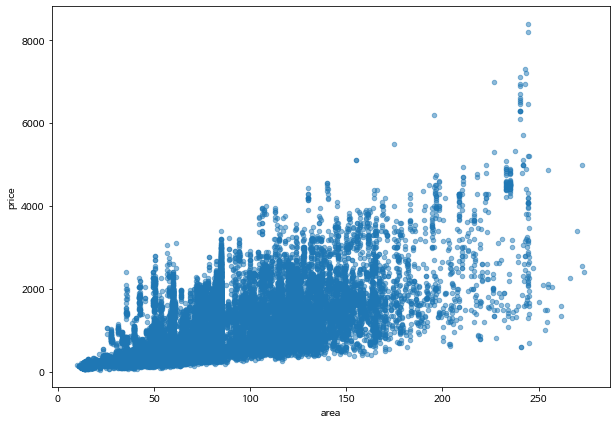

In [42]:
apart_2019.plot.scatter(x='area', y='price', alpha=0.5)

아파트의 면적과 거래 가격의 상관계수는 아래의 값으로 나타나며 숫자로만 보면 강한 양의 선형관계로 보인다. 

In [43]:
apart_2019[['area','price']].corr()

,area,price
area,1.000000,0.624639
price,0.624639,1.000000


아파트의 면적과 거래 가격에 대한 히스토그램을 그려 보면 정규분포의 형태와 매우 다른 오른쪽으로 꼬리가 긴 분포를 보이고 있다.  

<AxesSubplot:ylabel='Frequency'>

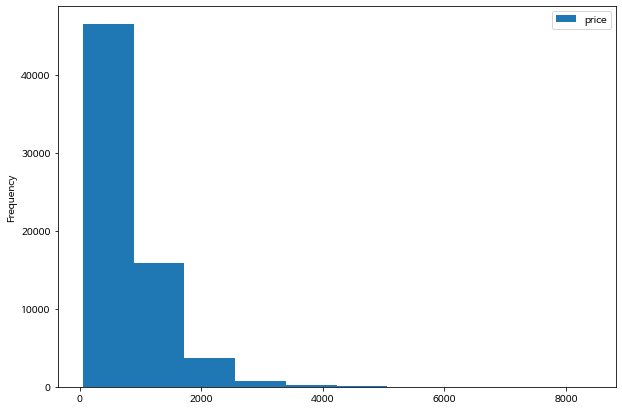

In [44]:
apart_2019[['price']].plot.hist()

<AxesSubplot:ylabel='Frequency'>

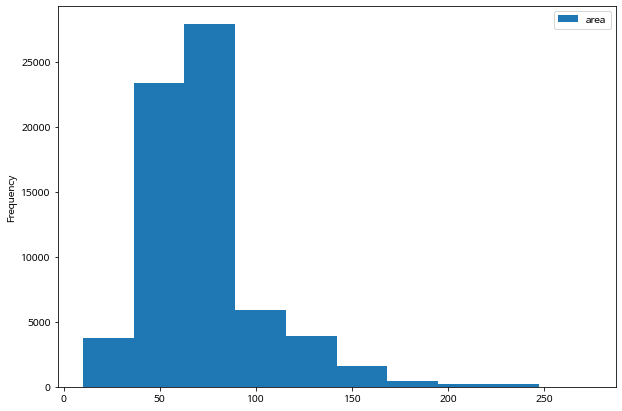

In [45]:
apart_2019[['area']].plot.hist()

민약 면적과 거래가격을 표준화 한 후에 산점도를 그리면 어떤 형태가 나오는지 확인해 보자.단위는 달라졌지만 관계의 형태는 그대로 나타난다. 

<AxesSubplot:xlabel='area', ylabel='price'>

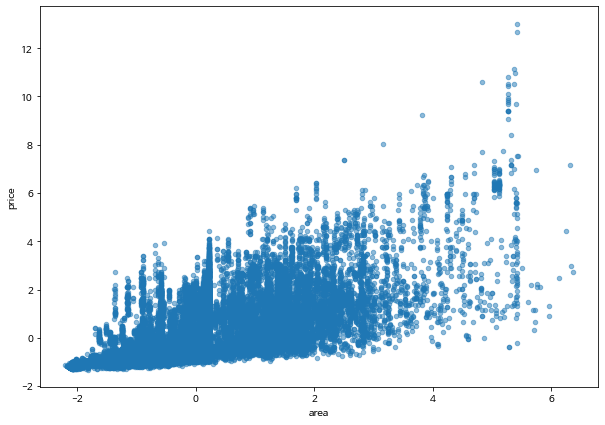

In [46]:
apart_2019[['area','price']].apply(standarize, axis=0).plot.scatter(x='area', y='price', alpha=0.5)

이제 2019년 아파트 실거래가 자격 자료를 하나의 자치구만 선택해서 면적과 거래 가격의 관계를 살펴보자. 

In [47]:
apart_2019_gu = apart_2019.loc[apart_2019.gu == '노원구']

In [48]:
apart_2019_gu.shape

(6507, 6)

<AxesSubplot:xlabel='area', ylabel='price'>

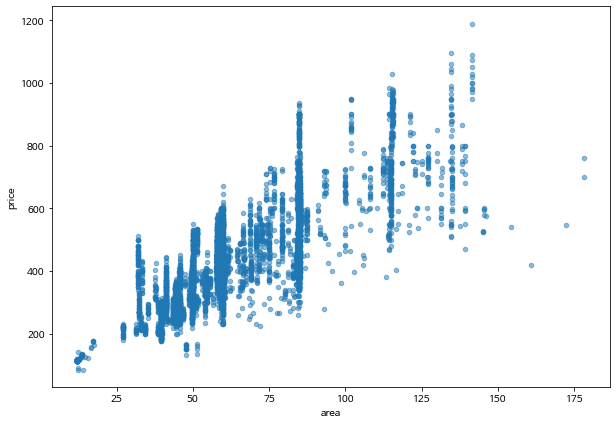

In [49]:
apart_2019_gu.plot.scatter(x='area', y='price', alpha=0.5)

In [50]:
apart_2019_gu[['area','price']].corr()

,area,price
area,1.000000,0.809307
price,0.809307,1.000000


## 예제3: 학생의 성적

어느 대학교의 기초 통계학을 수강한 학생들의 중간고사와 기말고사의 성적이 어떤 관계를 가지는지 실제 데이터를 이용하여 살펴보자.

다음은 124명의 학생들에 대한 중간고사와 기말고사 성적이다. 



In [51]:
url4 ="https://ilovedata.github.io/teaching/bigdata2/data/mid-final-scores.csv"
scores01 = pd.read_csv(url4, encoding="CP949", delim_whitespace=True)

In [52]:
scores01.shape

(124, 2)

In [53]:
scores01.head(5)

,mid,final
0,57,88
1,54,79
2,69,42
3,72,91
4,63,84


디음 그림을 보면 위에서 살펴본 키와 몸무게 또는  아파트 면적과 가격에서 나타나는 관계와 다른 형태이다. 

중간고사와 기말고사의 성적이 작으면 두 변수의 관계가 약해지고, 성적이 크면 관계가 강해지는 경향을 보인다.  상관계수는 강한 상관 관계를 보이고 있다.

In [54]:
scores01.corr()

,mid,final
mid,1.000000,0.473827
final,0.473827,1.000000


<AxesSubplot:xlabel='mid', ylabel='final'>

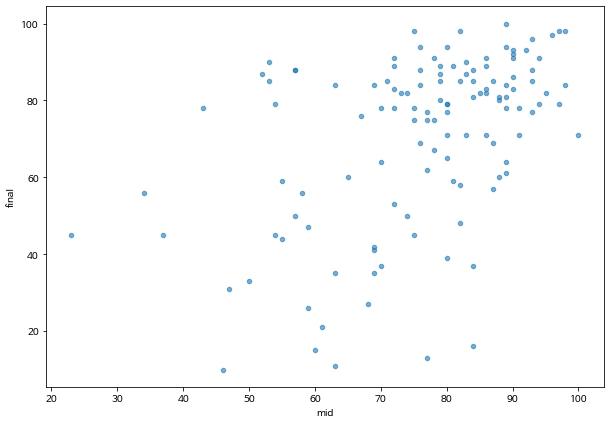

In [55]:
scores01.plot.scatter(x='mid', y='final', alpha=0.6)

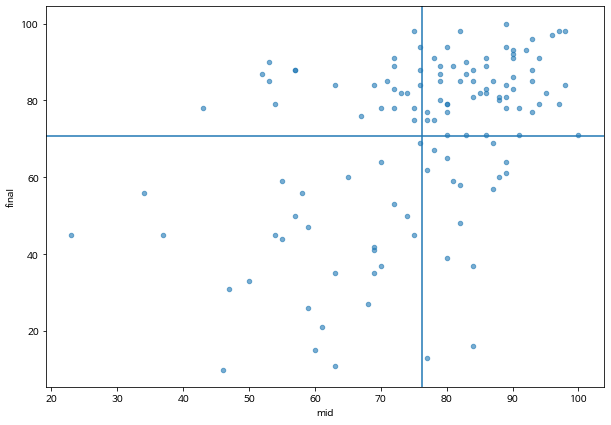

In [56]:
scores01.plot.scatter(x='mid', y='final', alpha=0.6)
plt.axvline(x=np.mean(scores01.mid)) 
plt.axhline(y=np.mean(scores01.final))